In [2]:
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [10]:
def compress_image(image, num_colors, color1, color2):
    image = Image.open(image)
    image = np.array(image, dtype=np.float32) / 255

    image = cv2.cvtColor(image, color1)

    width, height, depth = tuple(image.shape)
    pixels = np.reshape(image, (width * height, depth))

    kmeans = KMeans(n_clusters=num_colors).fit(pixels)
    pred = kmeans.predict(pixels)

    compressed_image = np.zeros(tuple(image.shape), dtype=np.float32)

    p = 0    
    for i in range(width):
        for j in range(height):
            compressed_image[i][j] = kmeans.cluster_centers_[pred[p]]
            p += 1
    
    return cv2.cvtColor(compressed_image, color2)

def show_image(image):
    plt.imshow(image)

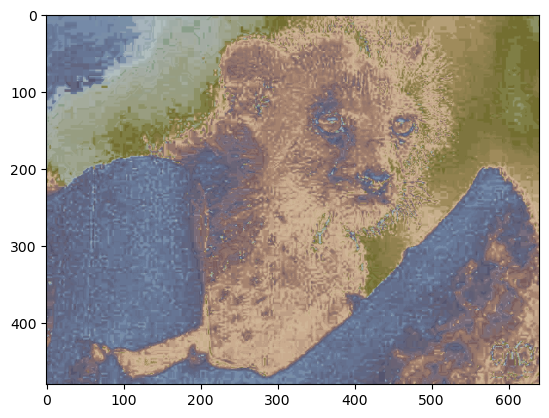

In [11]:
compressed_image = compress_image('image2.jpg', 64, cv2.COLOR_RGB2HSV, cv2.COLOR_HSV2RGB)
show_image(compressed_image)

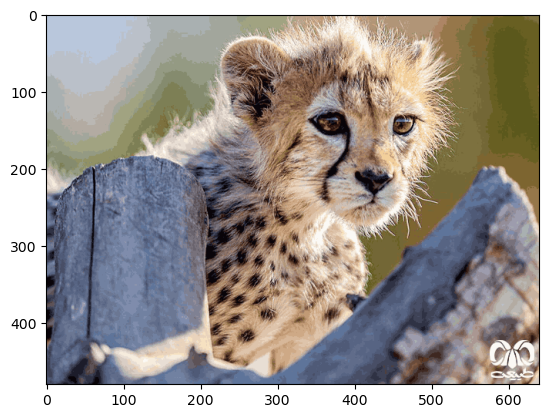

In [5]:
compressed_image = compress_image('image2.jpg', 64, cv2.COLOR_RGB2YCrCb, cv2.COLOR_YCrCb2RGB)
show_image(compressed_image)

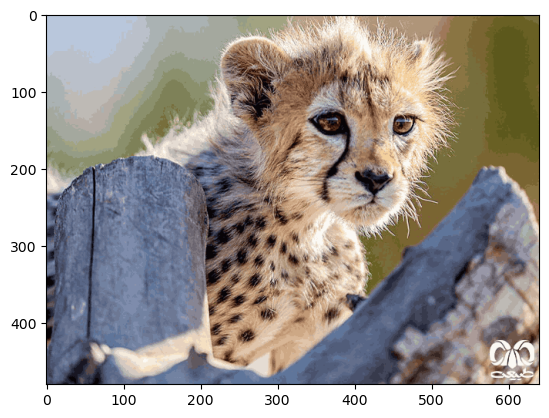

In [6]:
compressed_image = compress_image('image2.jpg', 64, cv2.COLOR_RGB2YUV, cv2.COLOR_YUV2RGB)
show_image(compressed_image)

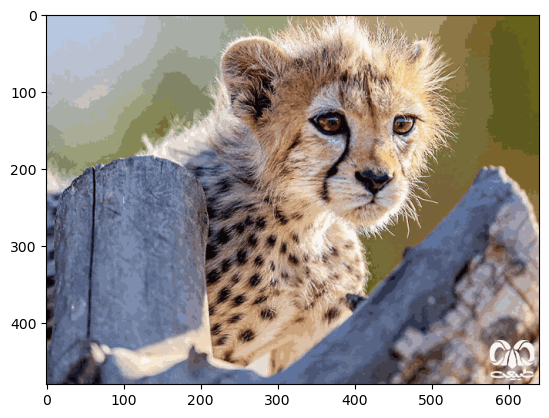

In [7]:
compressed_image = compress_image('image2.jpg', 64, cv2.COLOR_RGB2LAB, cv2.COLOR_LAB2RGB)
show_image(compressed_image)

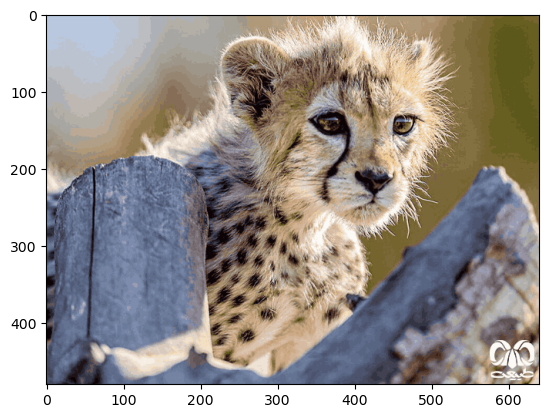

In [8]:
compressed_image = compress_image('image2.jpg', 64, cv2.COLOR_RGB2XYZ, cv2.COLOR_XYZ2RGB)
show_image(compressed_image)

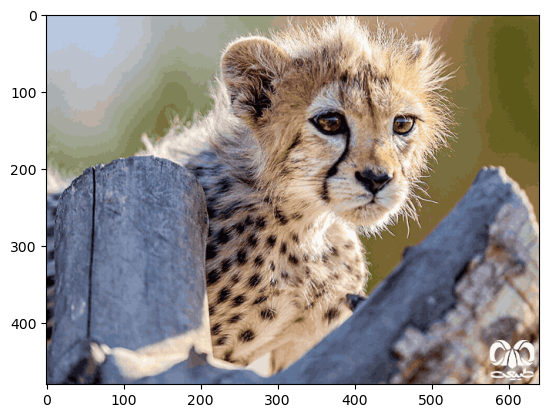

In [9]:
compressed_image = compress_image('image2.jpg', 64, None, None)
show_image(compressed_image)